#### Data Preprocessing 

In [1]:
# Importing necessary modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv('BodyFat.csv')
data.columns = map(str.lower, data.columns)
data.head()

,idno,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
# Dropping IDNO from the data 
data = data.drop(columns=['idno'])

In [4]:
# Overview of the Data 
data.describe()

,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,18.938492,1.055574,44.884921,178.924405,70.148810,25.436905,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,7.750856,0.019031,12.602040,29.389160,3.662856,3.648111,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,0.995000,22.000000,118.500000,29.500000,18.100000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.800000,1.041400,35.750000,159.000000,68.250000,23.100000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.000000,1.054900,43.000000,176.500000,70.000000,25.050000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,24.600000,1.070400,54.000000,197.000000,72.250000,27.325000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,45.100000,1.108900,81.000000,363.150000,77.750000,48.900000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [5]:
# Checking for missing values
data.head()

,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


C:\Users\SHerlock\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Body Fat'}, xlabel='bodyfat', ylabel='Density'>

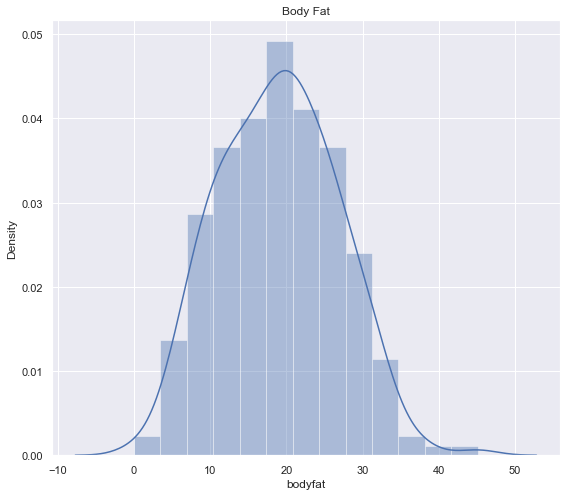

In [6]:
# Visualising the dependent variable (BODYFAT)
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Body Fat')
sns.distplot(data.bodyfat)


#### Convert height and weight to SI unit and then calculate the Body-Mass Index

In [7]:
for col in data.columns[6:]:
    data[col] /= 100
    data[col] = round(data[col], 2)

In [8]:
# converting weight from lbs to kg
data['weight_kg'] = data.weight / 2.2 
# converting height from inches to m 
data['height_m'] = data.height * 0.025

#calculating bmi for verification
data['bmi'] = data.weight_kg / (data.height_m ** 2) 

#rounding the value to 1 decimal
data.weight_kg = round(data.weight_kg, 2)
data.height_m = round(data.height_m, 2)
data.bmi = round(data.bmi, 1)

# data.drop(columns=['weight','height'],axis=1,inplace=True)

In [9]:
# data.describe()
data.head()

,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist,weight_kg,height_m,bmi
0,12.6,1.0708,23,154.25,67.75,23.7,0.36,0.93,0.85,0.94,0.59,0.37,0.22,0.32,0.27,0.17,70.11,1.69,24.4
1,6.9,1.0853,22,173.25,72.25,23.4,0.38,0.94,0.83,0.99,0.59,0.37,0.23,0.30,0.29,0.18,78.75,1.81,24.1
2,24.6,1.0414,22,154.00,66.25,24.7,0.34,0.96,0.88,0.99,0.60,0.39,0.24,0.29,0.25,0.17,70.00,1.66,25.5
3,10.9,1.0751,26,184.75,72.25,24.9,0.37,1.02,0.86,1.01,0.60,0.37,0.23,0.32,0.29,0.18,83.98,1.81,25.7
4,27.8,1.0340,24,184.25,71.25,25.6,0.34,0.97,1.00,1.02,0.63,0.42,0.24,0.32,0.28,0.18,83.75,1.78,26.4


### Observation : The dependent variable is normally distributed 

#### Given the data and discussion in the class we already know that the data contains few outliers and absurd values 
#### We know that from our description of the data the minimum value for BodyFat is "0" which is not possible 
#### Hence we need to handle outliers 

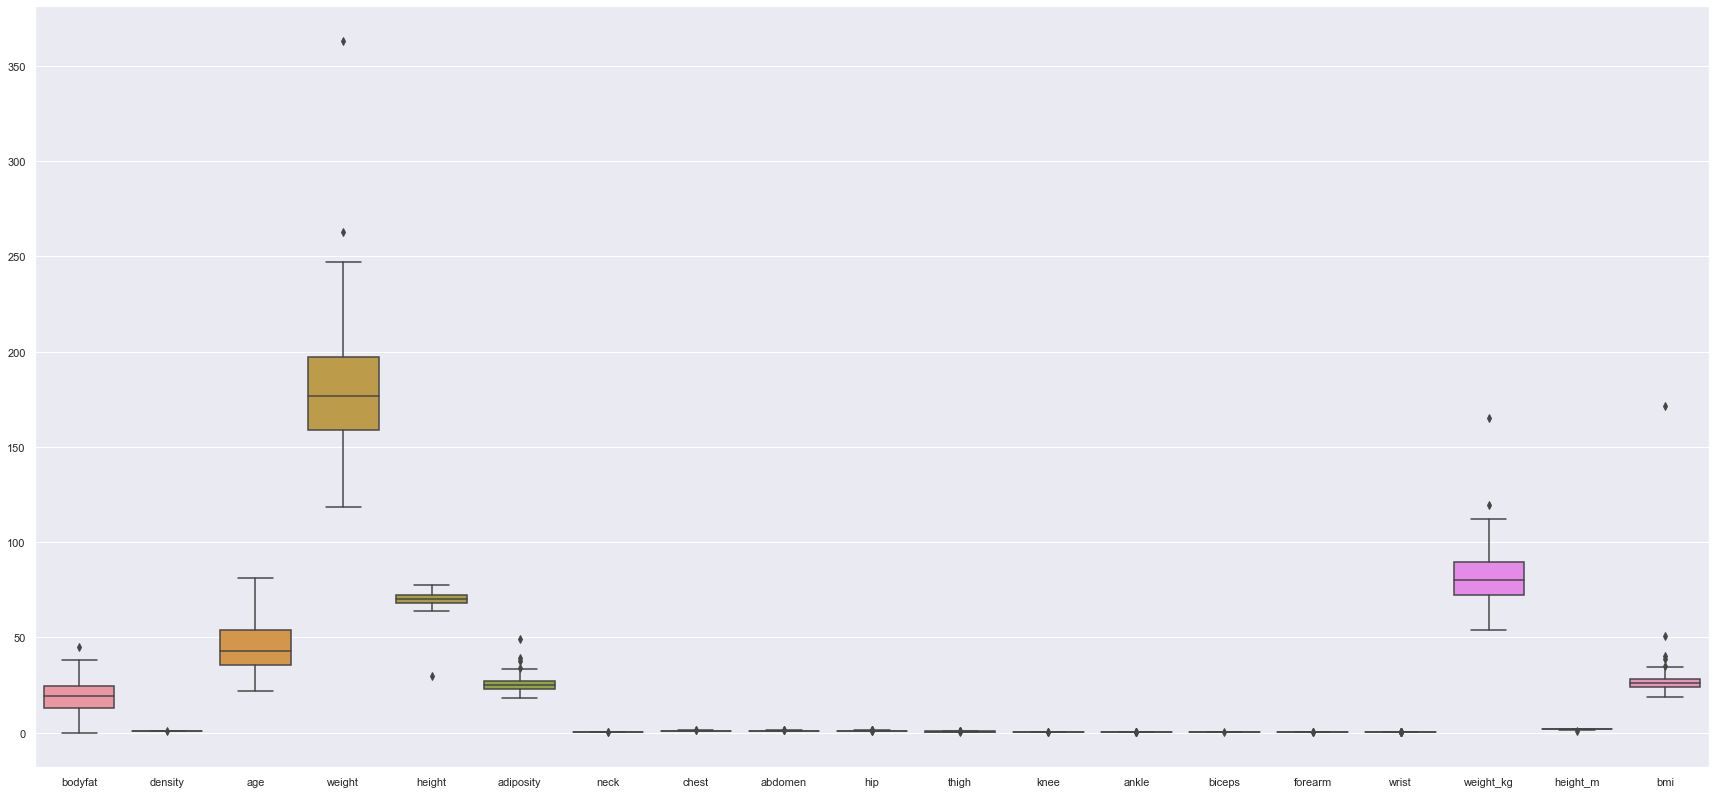

In [10]:
# Using bloxplots to find outliers 
plt.figure(figsize=(30,14))
sns.boxplot(data=data)
plt.show()


#### Performing outlier detection 

#### Principles of the Normal Distribution and the empirical rule (68–95–99 rule)

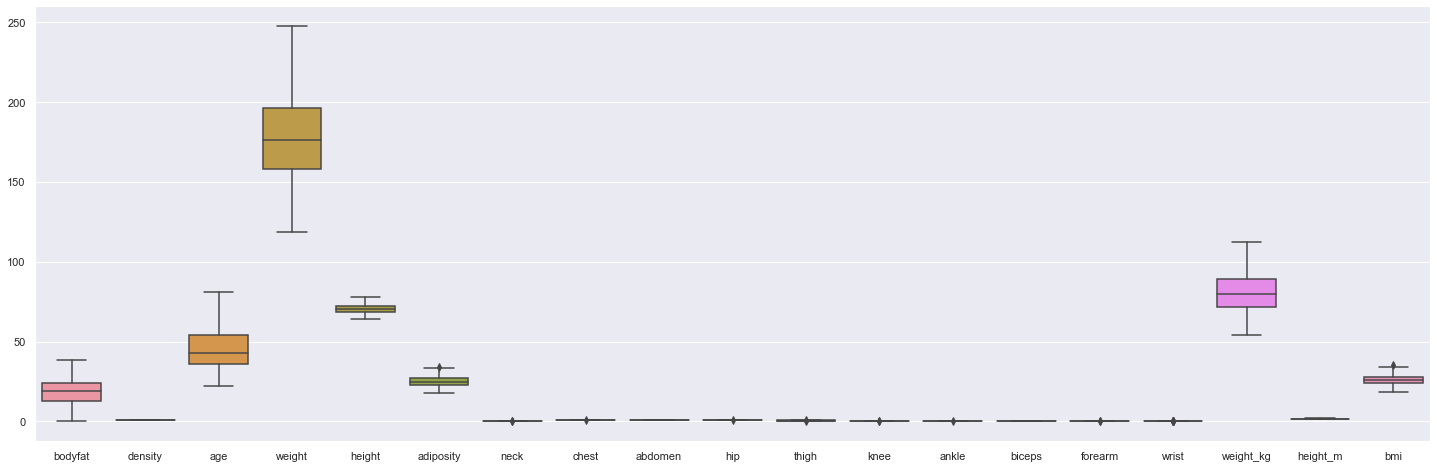

In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

final_data = data[~((data < (Q1 - 2 * IQR)) | (data > (Q3 + 2 * IQR))).any(axis=1)]
plt.figure(figsize=(25,8))
sns.boxplot(data=final_data)
plt.show()

In [12]:
final_data.describe()

,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist,weight_kg,height_m,bmi
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,18.571311,1.056447,44.897541,177.192828,70.329918,25.166803,0.378443,1.003811,0.919057,0.993852,0.590984,0.385000,0.229795,0.321598,0.286680,0.181598,80.541885,1.758566,26.002459
std,7.427510,0.018321,12.667063,26.288919,2.597931,3.090648,0.022808,0.078645,0.097282,0.061295,0.047660,0.023509,0.013802,0.029192,0.020124,0.009575,11.949884,0.065370,3.213064
min,0.000000,1.010100,22.000000,118.500000,64.000000,18.100000,0.310000,0.790000,0.690000,0.850000,0.470000,0.330000,0.190000,0.250000,0.220000,0.160000,53.860000,1.600000,18.600000
25%,12.800000,1.042400,35.750000,157.937500,68.250000,23.075000,0.360000,0.940000,0.840000,0.950000,0.560000,0.370000,0.220000,0.300000,0.270000,0.180000,71.790000,1.710000,23.800000
50%,18.800000,1.055550,43.000000,175.750000,70.125000,24.850000,0.380000,1.000000,0.910000,0.990000,0.590000,0.380000,0.230000,0.320000,0.290000,0.180000,79.885000,1.755000,25.700000
75%,24.050000,1.070425,54.000000,195.812500,72.250000,27.200000,0.390000,1.050000,0.990000,1.030000,0.620000,0.400000,0.240000,0.340000,0.300000,0.190000,89.007500,1.810000,28.100000
max,38.200000,1.108900,81.000000,247.250000,77.750000,33.900000,0.440000,1.220000,1.180000,1.160000,0.730000,0.460000,0.270000,0.390000,0.350000,0.210000,112.390000,1.940000,35.100000


#### Checking Correlation 

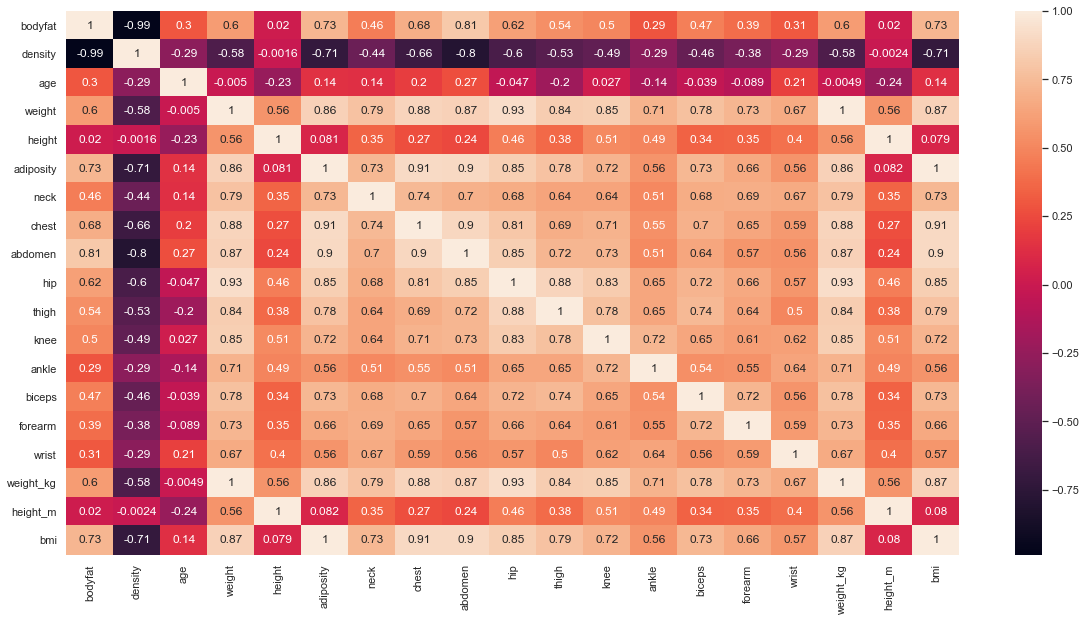

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(),annot=True)
plt.show()

In [14]:
# abdomen and chest 0.89. Droping chest.
# drop density.
# Forearm and Biceps also 0.81. Drop one.
# Dropping height and weight from our analysis since we have BMI.
# BMI highly correlated with Chest: 0.90 , Abdomen : 0.89
# Thigh and HIP : 0.87

In [15]:
final_data.columns

Index(['bodyfat', 'density', 'age', 'weight', 'height', 'adiposity', 'neck',
       'chest', 'abdomen', 'hip', 'thigh', 'knee', 'ankle', 'biceps',
       'forearm', 'wrist', 'weight_kg', 'height_m', 'bmi'],
      dtype='object')

In [16]:
final_data.drop(columns=['density','chest','weight','thigh','forearm','height','height_m','weight_kg'],axis=1,inplace=True)

C:\Users\SHerlock\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
final_data

,bodyfat,age,adiposity,neck,abdomen,hip,knee,ankle,biceps,wrist,bmi
0,12.6,23,23.7,0.36,0.85,0.94,0.37,0.22,0.32,0.17,24.4
1,6.9,22,23.4,0.38,0.83,0.99,0.37,0.23,0.30,0.18,24.1
2,24.6,22,24.7,0.34,0.88,0.99,0.39,0.24,0.29,0.17,25.5
3,10.9,26,24.9,0.37,0.86,1.01,0.37,0.23,0.32,0.18,25.7
4,27.8,24,25.6,0.34,1.00,1.02,0.42,0.24,0.32,0.18,26.4
...,...,...,...,...,...,...,...,...,...,...,...
247,11.5,70,21.1,0.35,0.84,0.89,0.35,0.22,0.26,0.18,21.8
248,32.3,72,29.1,0.41,1.05,1.04,0.41,0.23,0.35,0.20,30.0
249,28.3,72,30.2,0.39,1.12,1.02,0.37,0.22,0.31,0.18,31.2
250,25.3,72,27.0,0.39,1.01,0.98,0.42,0.23,0.30,0.20,27.9


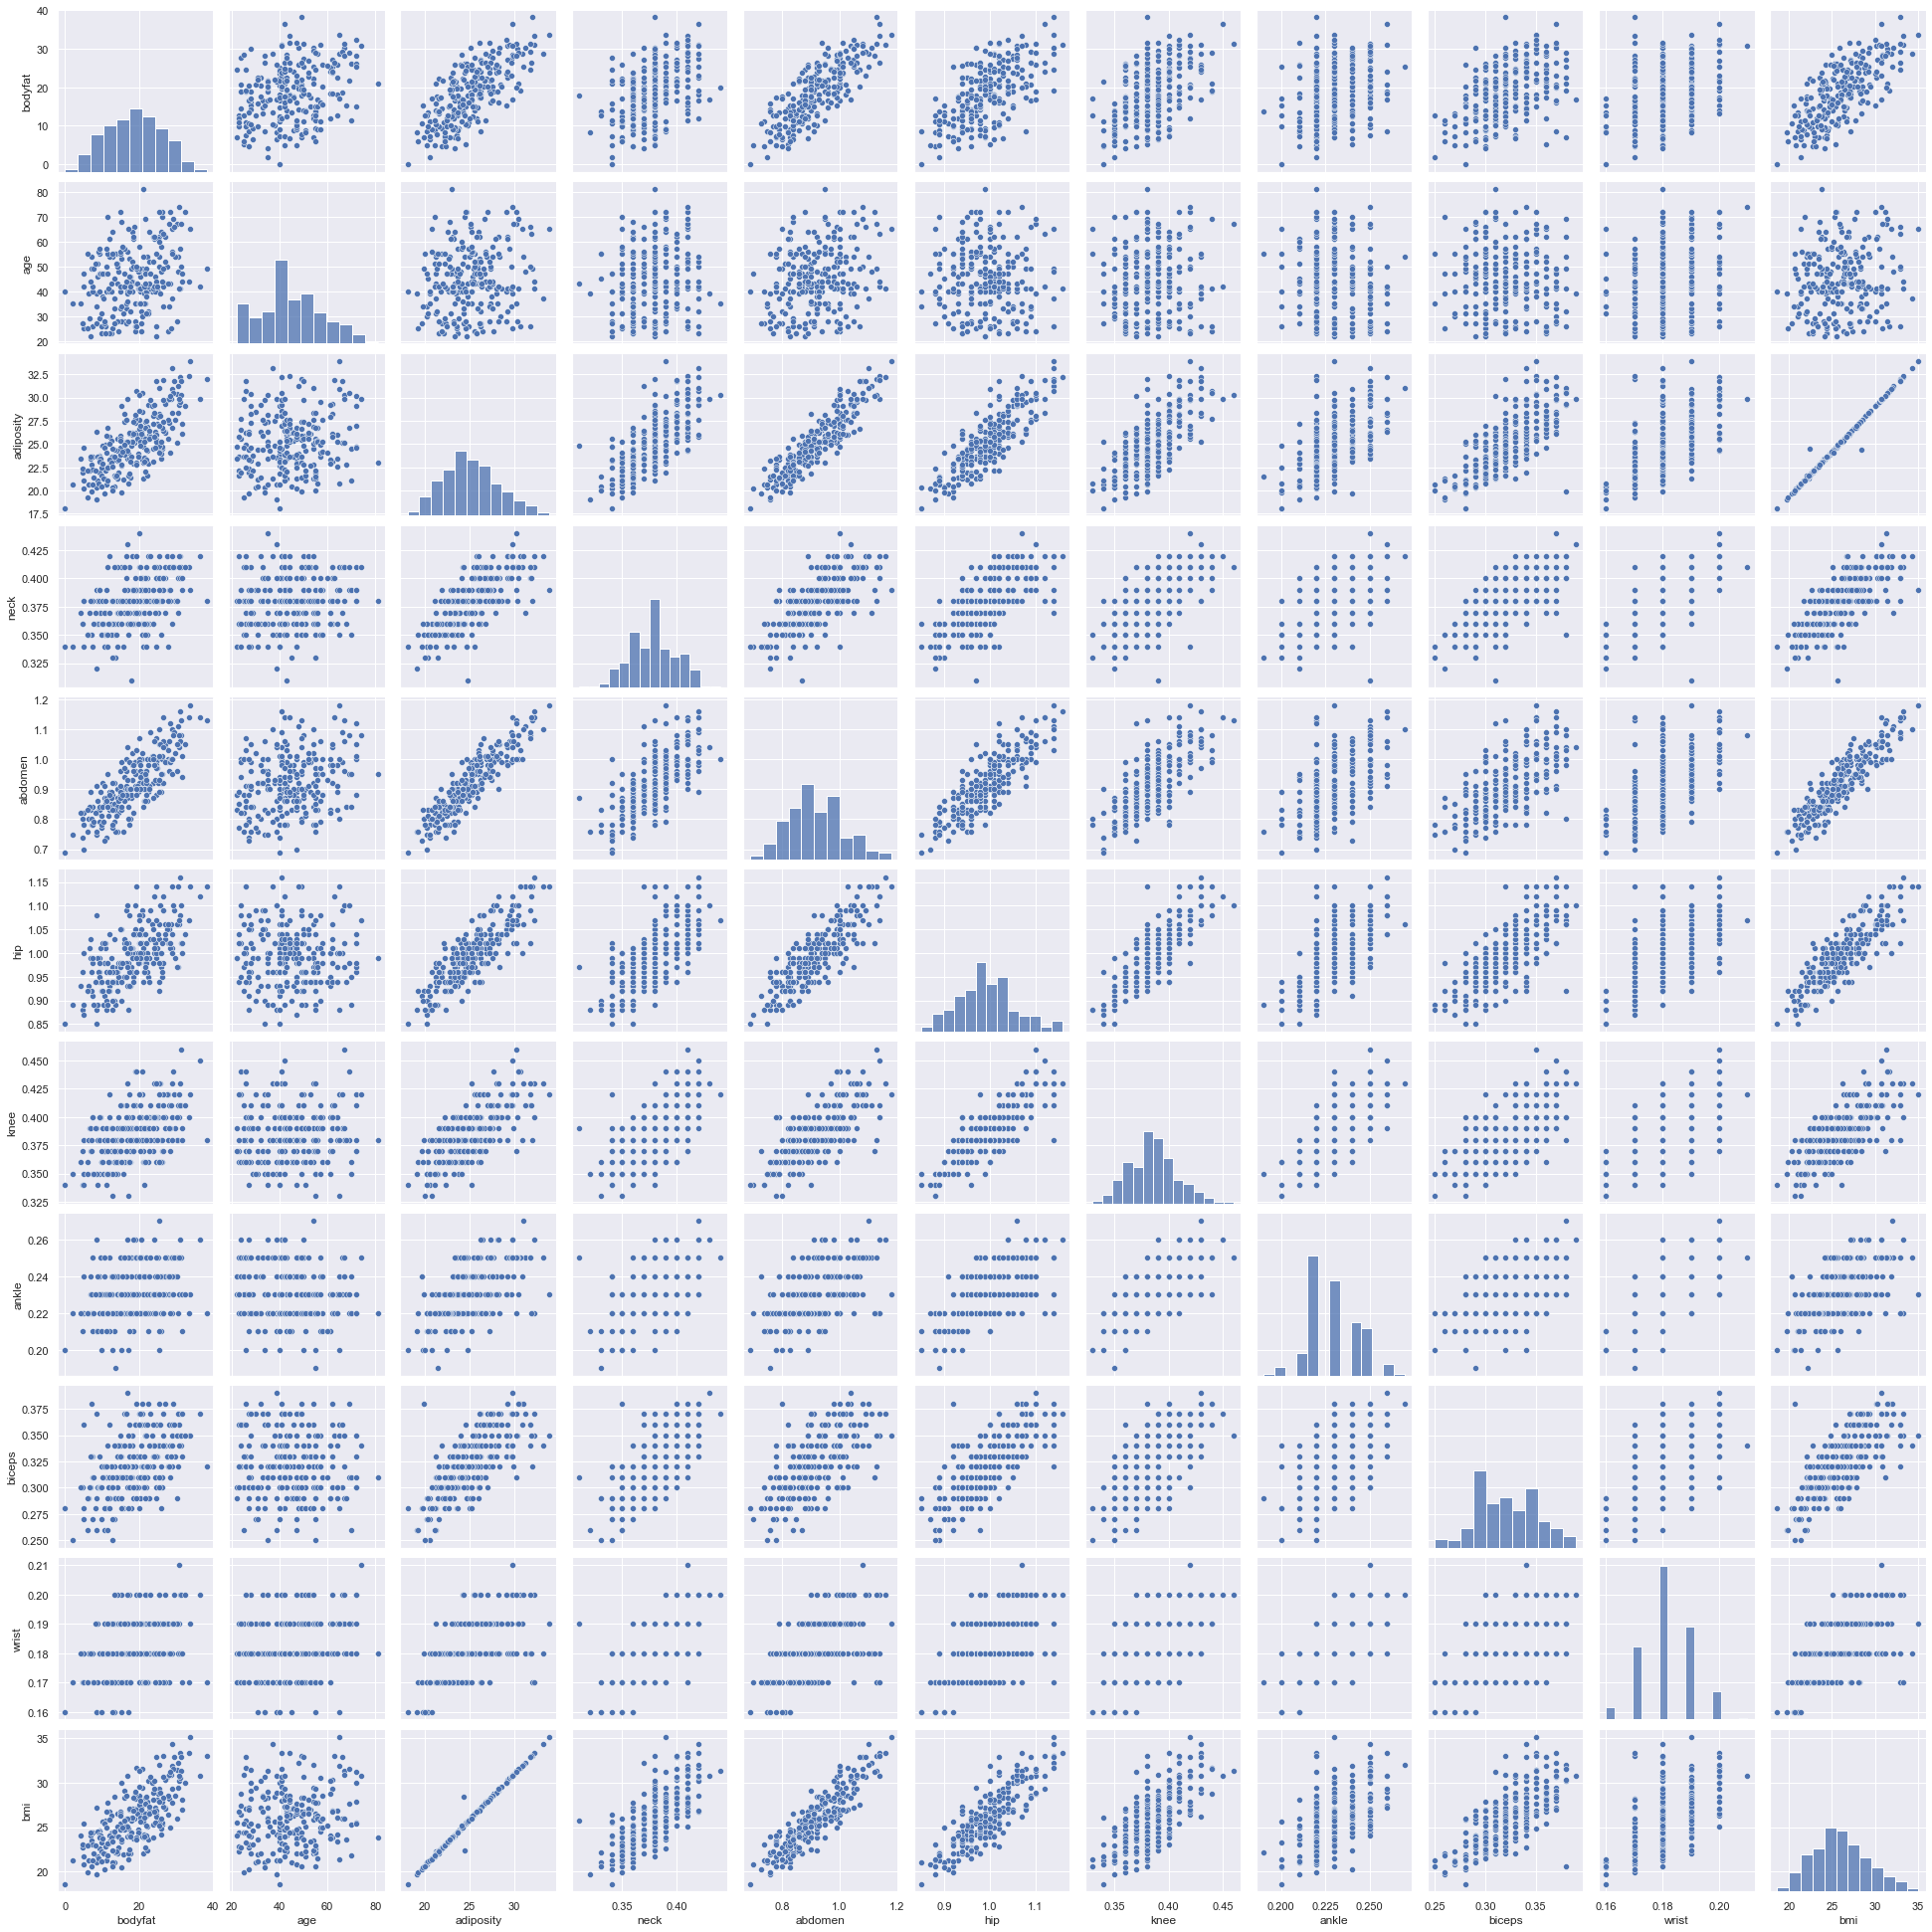

In [18]:
sns.pairplot(final_data)

In [19]:
# Based on above pair-plot, the top 3 predictors of body-fat appear to be
predictors = ['abdomen', 'bmi', 'hip']

# Defining the dependent and independent variables 
y = final_data['bodyfat']
# x = final_data.drop(['bodyfat','age','ankle', 'bmi'],axis=1)
x = final_data[['abdomen','adiposity','hip']]

In [20]:
x.head()

,abdomen,adiposity,hip
0,0.85,23.7,0.94
1,0.83,23.4,0.99
2,0.88,24.7,0.99
3,0.86,24.9,1.01
4,1.00,25.6,1.02


In [21]:
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge

In [22]:
# Yeo-Johnson Power Transformation inflates low variance data and deflates high variance data to create a more uniform dataset.
# This transformation helps in normalizing weightage of representation.
# This avoids any additional work needed for choosing test data. It can be chosen at random.

trans = PowerTransformer()
x = trans.fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [23]:
sgd = SGDRegressor()
kernel = KernelRidge()
random = RandomForestRegressor()
linear = LinearRegression()
elastic = ElasticNet()
lasso  = Lasso()
ridge = Ridge()
grad = GradientBoostingRegressor()
bay = BayesianRidge()
clf = [linear,elastic,lasso,ridge,grad,sgd,bay,random]
hashmap={}

In [24]:
def compute(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    hashmap[str(model)]=(r2,rmse)

In [25]:
for i in clf:
    compute(i)

In [26]:
score=pd.DataFrame(hashmap)
score = score.transpose()
score.columns=['R2_score','RMSE']
score = score.sort_values('R2_score',ascending=False)


In [27]:
score

,R2_score,RMSE
SGDRegressor(),0.718613,4.123774
Ridge(),0.716179,4.141573
BayesianRidge(),0.716172,4.141617
LinearRegression(),0.715786,4.144432
RandomForestRegressor(),0.671563,4.455218
Lasso(),0.666507,4.489374
GradientBoostingRegressor(),0.658140,4.545345
ElasticNet(),0.602608,4.900634


Hyperparameter tuning

In [164]:
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.001,0.01, 0.1, 1.0, 5.0,10.0, 11.0, 12.0,13.0, 14.0, 15.0],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Algorithm to use in the computation
                'max_iter': [100, 300, 500] 
               ,'random_state':[42]}

# Hyperparameter grid for Bayesian Ridge
bayesian_ridge_params = {
    'n_iter': [500],
    'alpha_1': [1e-7,1e-6, 1e-5, 1e-4, 1e-3,1e-2],
    'alpha_2': [1e-7,1e-6, 1e-5, 1e-4,1e-3,1e-2],
    'lambda_1': [1e-7,1e-6, 1e-5, 1e-4,1e-3,1e-2],
    'lambda_2': [1e-7,1e-6, 1e-5, 1e-4,1e-3,1e-2],
}

In [165]:
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=10, scoring='r2', n_jobs=-1)


bayesian_ridge_grid = GridSearchCV(BayesianRidge(), bayesian_ridge_params, cv=10, scoring='r2', n_jobs=-1)



In [166]:
ridge_grid.fit(X_train, y_train)
bayesian_ridge_grid.fit(X_train, y_train)

best_ridge_params = ridge_grid.best_params_
best_bayesian_ridge_params = bayesian_ridge_grid.best_params_

In [167]:
best_ridge = Ridge(**best_ridge_params)
best_bayesian_ridge = BayesianRidge(**best_bayesian_ridge_params)

clff=[best_ridge,best_bayesian_ridge]

In [168]:
hashmapp={}

def computee(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    hashmapp[str(model)]=(r2,rmse)

for i in clff:
    computee(i)

In [169]:
score1=pd.DataFrame(hashmapp)
score1 = score1.transpose()
score1.columns=['R2_score','RMSE']
score1 = score1.sort_values('R2_score',ascending=False)

In [170]:
score1

,R2_score,RMSE
"Ridge(max_iter=100, random_state=42, solver='sag')",0.716188,4.141501
"BayesianRidge(alpha_1=0.01, alpha_2=1e-07, lambda_1=1e-07, lambda_2=0.01,\n n_iter=500)",0.716172,4.141618
